# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [1]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems.

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 42,000 training examples, and 28,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import cm
from matplotlib.ticker import LinearLocator

import sklearn
# from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.cluster import BisectingKMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from PIL import Image

import yellowbrick
from yellowbrick.cluster.elbow import kelbow_visualizer

# setting a seed to use when it's necessary 
seed = 217146 

print(f'Importação das bibliotecas com sucesso ')

Importação das bibliotecas com sucesso 


In [3]:
# getting environment where this application is running
import sys
IN_COLAB = 'google.colab' in sys.modules
print(IN_COLAB)

False


In [4]:
## ------ Reading Training Dataset from Google drive ----- ##
train_url='https://drive.google.com/uc?export=download&confirm=9iBg&id=1U_HeEtr_IznK413FMgzIvjd1WHMU66nX'
train_df = pd.read_csv(train_url)
# train_df = pd.read_csv('data/digit_recognizer_train.csv')

train_df = train_df.sample(frac=1)
train_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
9461,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17964,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38041,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54936,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13647,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## ------ Reading Test Dataset  ----- ##
test_url='https://drive.google.com/uc?export=download&confirm=9iBg&id=11uD9mh9Ebvdb8b714BbAzNOgcd92oJPb'
test_df = pd.read_csv(test_url)
# test_df = pd.read_csv('data/digit_recognizer_test.csv')

# extracting label from digits matrix 
test_labels = test_df['label']
test_digits = test_df.loc[:, test_df.columns != 'label']

# showing some lines os test dataset 
test_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


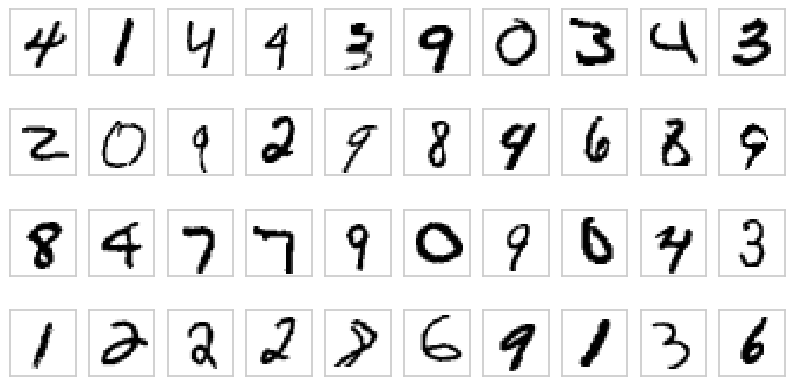

In [6]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(train_df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

### Normalizing data and evaluating hyperparameters

In [7]:
# extracting label from digits matrix 
labels = train_df['label']
digits = train_df.loc[:, train_df.columns != 'label']

# normlizing just the digits matrix 
scaler = StandardScaler()
digits_scaled = scaler.fit_transform(digits)

# print(f'digits_scaled: {digits_scaled}')
# print(f'-'*50)
print(f'Normalizing features (digits)')
print()
print(f'labels        : {labels.shape}')
print(f'digits        : {digits.shape}')
print(f'digits scaled : {digits_scaled.shape}')
# print(f'-'*50)

Normalizing features (digits)

labels        : (60000,)
digits        : (60000, 784)
digits scaled : (60000, 784)


In [8]:
# Função para plotar os resultados, extraída de:

#
# https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/
#
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

print(f'Compilou a função "scatter()"')


Compilou a função "scatter()"


(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

C:\Users\Rubens\AppData\Local\Temp\ipykernel_12780\1340347566.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


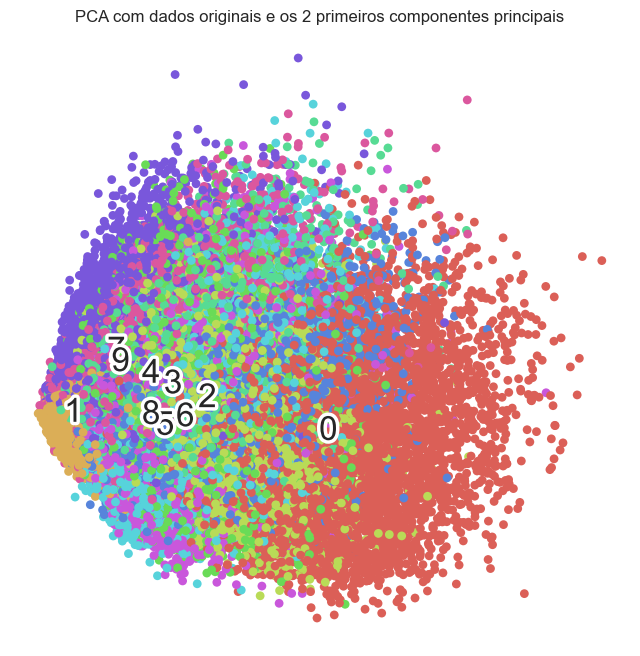

In [9]:
# TODO: Principal Component Analysis (PCA)
number_of_component = 2
model_pca = PCA(n_components=number_of_component, random_state=seed)
digits_pca = model_pca.fit(digits_scaled).transform(digits_scaled)

# show plot 
scatter(digits_pca, labels)
plt.title('PCA com dados originais e os 2 primeiros componentes principais')
plt.show()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

(60000, 784)
(60000, 2)


C:\Users\Rubens\AppData\Local\Temp\ipykernel_17208\1340347566.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


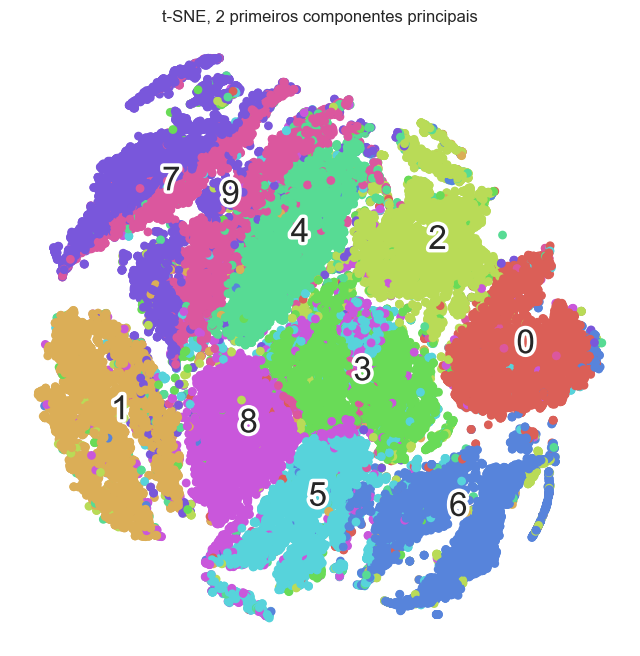

In [10]:
# TODO: T-distributed Stochastic Neighbor Embedding (t-SNE)
# What, Why and How of t-SNE: https://towardsdatascience.com/what-why-and-how-of-t-sne-1f78d13e224d

# model_tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=250)
model_tsne = TSNE(n_components=2, random_state=seed, perplexity=30)
digits_tsne = model_tsne.fit_transform(digits_scaled)
 
print(digits_scaled.shape) 
print(digits_tsne.shape) 

# show plot 
scatter(digits_tsne, labels)
plt.title('t-SNE, 2 primeiros componentes principais')
plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

(60000, 784)
(60000, 2)


C:\Users\Rubens\AppData\Local\Temp\ipykernel_17208\1340347566.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=palette[colors.astype(np.int)])


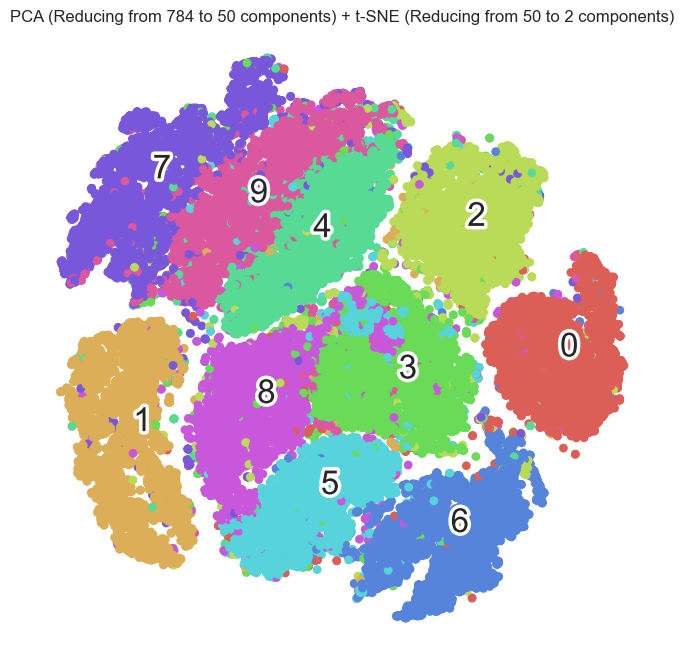

In [11]:
# TODO: PCA + t-SNE

# method PCA reducing from 784 to 50 features 
model_pca2 = PCA(n_components=50, random_state=seed)
digits_pca2 = model_pca2.fit(digits_scaled).transform(digits_scaled)

# method t-SNE reducing from 50 to 2 features 
model_tsne2 = TSNE(n_components=2, random_state=seed, perplexity=30)
digits_tsne2 = model_tsne.fit_transform(digits_pca2)
 
print(digits_scaled.shape) 
print(digits_tsne.shape) 

# show plot 
scatter(digits_tsne2, labels)
plt.title('PCA (Reducing from 784 to 50 components) + t-SNE (Reducing from 50 to 2 components)')
plt.show()

(0.25 point) Plot a 3D graph using the best representation founded.

In [12]:
# TODO: 3D Graph

# setting number of components for PCA and t-SNE methods 
n_components_original = digits_scaled.shape[1]
n_components_pca   = 50
n_components_t_SNE = 3

# method PCA reducing from 784 to 50 features 
n_components_pca = 50
model_pca3 = PCA(n_components=n_components_pca, random_state=seed)
digits_pca3 = model_pca3.fit(digits_scaled).transform(digits_scaled)

# method t-SNE reducing from 50 to 3 features 
model_tsne3 = TSNE(n_components=n_components_t_SNE, random_state=seed, perplexity=5)
digits_tsne3 = model_tsne3.fit_transform(digits_pca3)

print(digits_tsne3.shape)


KeyboardInterrupt: 

In [ ]:
# #######################################################################################################
# plot 3D Graph 
# from https://www.tutorialspoint.com/creating-a-3d-plot-in-matplotlib-from-a-3d-numpy-array
# #######################################################################################################

# Make data.
X = digits_tsne3[:,0]
Y = digits_tsne3[:,1]
Z = digits_tsne3[:,2]

plt.rcParams["figure.figsize"] = [13.00, 9.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# data = np.random.random(size=(3, 3, 3))
# z, x, y = data.nonzero()
# ax.scatter(X, Y, Z, c=Z, alpha=1)
ax.scatter3D(X, Y, Z, c=Z, cmap='rainbow', alpha=1)
ax.set_xlabel('Componente 1 ( X )')
ax.set_ylabel('Componente 2 ( Y )')
ax.set_zlabel('Componente 3 ( Z )')
title = f'PCA (Reducing from {n_components_original} to {n_components_pca} components ' + \
        f't-SNE (Reducing from {n_components_pca} to {n_components_t_SNE} components'

plt.title('PCA (784 to 50 components) + t-SNE (50 to 3 components)')
plt.show()

**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [ ]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.show()

In [ ]:
## Plot the original images using two arrays: 
#    best_embedding with the components (n_components=2) from either PCA or t-SNE;
#    images with the original data. Both arrays should correspond to the same data.

#plot_images(best_embedding, df)

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [ ]:
# !pip install umap-learn -q

In [ ]:
# Uniform Manifold Approximation and Projection (UMAP)

## 2. Unsupervised Learning

The main idea of this section is to train an unsupervised learning algorithm to identify the possible groups present in the MNIST dataset. 

(0.25 point) Train a KMeans algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the KMeans algorithm.*

In [ ]:
# TODO: KMeans with a dimension reduction technique.

# getting KMeans object with its hyperparameters 
# kmeans = KMeans(n_clusters=10, n_init=50, max_iter=300, init='random')
kmeans_model = KMeans(n_clusters=10, n_init=50)

# fitting components 
kmeans_model.fit(digits_tsne2)

print(f'kmeans.cluster_centers_ {kmeans_model.cluster_centers_}')
print()
print(f'kmeans.labels_ {kmeans_model.labels_}')

# show plot 
plt.scatter(digits_tsne2[:,0],digits_tsne2[:,1], c=kmeans_model.labels_, cmap='rainbow')

plt.title('KMeans utilizando dados com redução de dimensionalidade')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()

(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

In [ ]:
# TODO: Elbow Method and 2D plot
# From https://predictivehacks.com/k-means-elbow-method-code-for-python/

distortions = []
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, n_init=50)
    kmeans_model.fit(digits_tsne2)

    distortions.append(kmeans_model.inertia_)

In [ ]:
# show plot 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

In [ ]:
# TODO: Silhouette Method -- Average Score and plot
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(digits_tsne2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(digits_tsne2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(digits_tsne2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(digits_tsne2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        digits_tsne2[:, 0], digits_tsne2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of KMeans and the original data distribution.

In [ ]:
digits_tsne2.shape

In [ ]:
# TODO: Unsupervised Algorithm of your choose

# Birch method selected from scikit-learn clusters 
# From https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html

brc = Birch(n_clusters=10)
brc.fit(digits_tsne2)
cluster_labels = brc.predict(digits_tsne2)

# show plot 
plt.scatter(digits_tsne2[:,0],digits_tsne2[:,1], c=cluster_labels, cmap='rainbow')

plt.title('Birch utilizando dados com redução de dimensionalidade')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()


In [ ]:
# # TODO: Unsupervised Algorithm of your choose

# # Spectral clustering method selected from scikit-learn clusters 
# # From https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

# spectral_clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=seed)
# spectral_clustering.fit(digits_tsne2) 
# cluster_labels = spectral_clustering.predict(digits_tsne2)

# # show plot 
# plt.scatter(digits_tsne2[:,0],digits_tsne2[:,1], c=cluster_labels, cmap='rainbow')

# plt.title('Spectral clustering utilizando dados com redução de dimensionalidade')
# plt.xlabel('Componente 1')
# plt.ylabel('Componente 2')

# plt.show()


In [ ]:
# TODO: Unsupervised Algorithm of your choose

# Bisecting KMeans method selected from scikit-learn clusters 
# From https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html#sklearn.cluster.BisectingKMeans

bisect_means = BisectingKMeans(n_clusters=10, random_state=seed)
bisect_means.fit(digits_tsne2)
cluster_labels = bisect_means.predict(digits_tsne2)

# show plot 
plt.scatter(digits_tsne2[:,0],digits_tsne2[:,1], c=cluster_labels, cmap='rainbow')

plt.title('Bisecting KMeans utilizando dados com redução de dimensionalidade')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.show()

**(2 points) Questions:**

- Did KMeans provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did KMeans perform better? How can different clustering techniques be compared?

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [10]:
# TODO: Baseline Model

# Spliting training dataset 
X_train_original, X_valid_original, y_train_original, y_valid_original = \
    train_test_split(digits, labels, train_size=0.76, test_size=0.24, random_state=seed)

# setting test dataset 
X_test_original = test_digits
y_test_original = test_labels

# showing statistics
dataset_total_size = len(digits) + len(test_digits)

print(f'-'*70)
print()
print(f'Statistic of splitted dataset:')
print()
print(f'Training size   : {len(X_train_original)} - {(len(X_train_original) / dataset_total_size )*100:.2f}%')
print(f'Validation size : {len(X_valid_original)} - {(len(X_valid_original) / dataset_total_size)*100:.2f}%')
print(f'Testing size    : {len(X_test_original)} - {(len(X_test_original) / dataset_total_size)*100:.2f}%')
print(f'Dataset size    : {dataset_total_size} - 100%')

----------------------------------------------------------------------

Statistic of splitted dataset:

Training size   : 45600 - 65.14%
Validation size : 14400 - 20.57%
Testing size    : 10000 - 14.29%
Dataset size    : 70000 - 100%


In [11]:
# Normalizing features dataset 
scaler = StandardScaler()

scaler.fit(X_train_original)

X_train_scaled = scaler.transform(X_train_original)
X_valid_scaled = scaler.transform(X_valid_original)
X_test_scaled  = scaler.transform(X_test_original)

print(f'The features train, valid, and test were normalized')


The features train, valid, and test were normalized


In [12]:
print(X_train_scaled.shape)
print(y_train_original.shape)

(45600, 784)
(45600,)


In [ ]:
# # Reducing dimensionalitty to two components using PCA method 

# # fit model PCA with training data 
# number_of_components = 2
# model_pca_to_logistic = PCA(n_components=number_of_components, random_state=seed)
# model_pca_to_logistic.fit(X_train_scaled)

# # transforming train, valid and test features 
# X_train_scaled_PCA_components = model_pca_to_logistic.transform(X_train_scaled)
# X_valid_scaled_PCA_components = model_pca_to_logistic.transform(X_valid_scaled)
# X_test_scaled_PCA_components  = model_pca_to_logistic.transform(X_test_scaled)

# print(f'Reducing dimensionalitty to {number_of_components} components')
# print(X_train_scaled_PCA_components.shape)
# print(X_valid_scaled_PCA_components.shape)
# print(X_test_scaled_PCA_components.shape)

In [16]:
def plot_confusion_matrix(y, y_pred):
    """Plots a confusion matrix using seaborn comparing true values in y array with predicted values in y_pred array.

    Args:
        y (numpy.ndarray): Array with real values from set.
        y_pred (numpy.ndarray): Array with predicted values from set.
    """
    # transform y to numpy array
    y = np.asarray(y).ravel()

    # create dictionary and dataframe
    data = {'y' : y, 'y_pred' : y_pred}
    df = pd.DataFrame(data, columns=['y', 'y_pred'])

    # create cross tabulation in pandas
    color_map = pd.crosstab(df['y'], df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
    
    # show heatmap
    sns.heatmap(color_map, annot=True)
    plt.show()

print(f'Validation of "plot_confusion_matrix()" method with success.')


Validation of "plot_confusion_matrix()" method with success.


In [ ]:
# Performing Logistic Regression with all features

# parameters dictionary for finding the best estimator
params = {'C' : [0.25, 0.5, 0.75, 1, 2, 5, 10, 100],
          'multi_class' : ['auto', 'ovr', 'multinomial']}

# Initialize estimator
estimator = LogisticRegression(random_state=seed, max_iter=1000)

# Initializes grid search
classif = GridSearchCV(estimator=estimator, param_grid=params, cv=5)

# fit gridsearch
classif.fit(X_train_scaled, y_train_original)

# best estimator
classif_1 = classif.best_estimator_

# confusion matrix and f1 score
y_pred = classif_1.predict(X_valid_scaled)
f1score = f1_score(y_valid_original, y_pred, average='macro')

print('F1 score: ', f1score)
plot_confusion_matrix(y_valid_original, y_pred)

# cross-validation results
pd.DataFrame(classif.cv_results_).sort_values(by='rank_test_score').drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']).head()

In [ ]:
print(y_train_original.shape)
print(y_valid_original.shape)
print(y_pred.shape)

(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

In [17]:
# Reducing dimensionalitty to two components using PCA method 

def reduce_dimensionality(X_train, X_valid, X_test, number_of_components):

    # fit model PCA with training data 
    model_pca = PCA(n_components=number_of_components, random_state=seed)
    model_pca.fit(X_train_scaled)

    # transforming train, valid and test features 
    X_train_PCA_components = model_pca.transform(X_train_scaled)
    X_valid_PCA_components = model_pca.transform(X_valid_scaled)
    X_test_PCA_components  = model_pca.transform(X_test_scaled)

    print(f'-'*50)
    print(f'PCA - Reducing dimensionalitty to {number_of_components} components')
    print(X_train_PCA_components.shape)
    print(X_valid_PCA_components.shape)
    print(X_test_PCA_components.shape)
    print()

    # returnning data with its dimensionality reduced  
    return X_train_PCA_components, X_valid_PCA_components, X_test_PCA_components

--------------------------------------------------
Reducing dimensionalitty to 2 components
--------------------------------------------------

--------------------------------------------------
PCA - Reducing dimensionalitty to 2 components
(45600, 2)
(14400, 2)
(10000, 2)


--------------------------------------------------
F1 score:  0.28058404323389
--------------------------------------------------



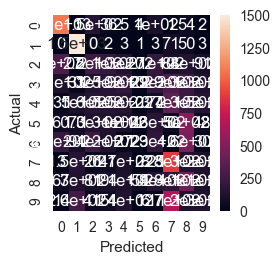

--------------------------------------------------
Reducing dimensionalitty to 3 components
--------------------------------------------------

--------------------------------------------------
PCA - Reducing dimensionalitty to 3 components
(45600, 3)
(14400, 3)
(10000, 3)


--------------------------------------------------
F1 score:  0.4713781882070302
--------------------------------------------------



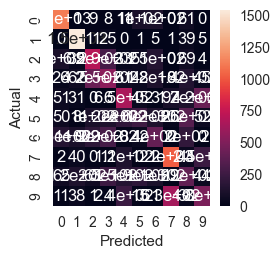

--------------------------------------------------
Reducing dimensionalitty to 5 components
--------------------------------------------------

--------------------------------------------------
PCA - Reducing dimensionalitty to 5 components
(45600, 5)
(14400, 5)
(10000, 5)


--------------------------------------------------
F1 score:  0.6575740021637955
--------------------------------------------------



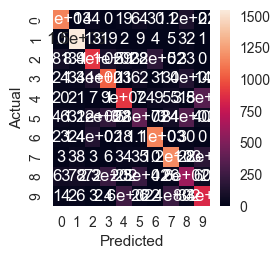

In [28]:
# TODO: Baseline Model with PCA
# 
# plotar n_componentes x acurácia >> sugestão anotada durante atendiment5o de monitoria
 
# Performing Logistic Regression with two features reduced with PCA

# parameters dictionary for finding the best estimator
params = {'C' : [0.25, 0.5, 0.75, 1, 2, 5, 10, 100],
          'multi_class' : ['auto', 'ovr', 'multinomial']}

# Initialize estimator
estimator = LogisticRegression(random_state=seed, max_iter=1000)

# Initializes grid search
classif = GridSearchCV(estimator=estimator, param_grid=params, cv=5)

# number of components 
components = [2, 4, 8, 16, 32, 64]

# initializing list of f1-score values  
f1_score_values = []

# running logistic regression with many n_components values
for number_of_component in components:
    print(f'-'*50)
    print(f'Reducing dimensionalitty to {number_of_component} components')
    print(f'-'*50)
    print()

    # getting dataset with reduced components
    X_train_reduced, X_valid_reduced, X_test_reduced = \
        reduce_dimensionality(X_train_scaled, X_valid_scaled, X_test_scaled, number_of_component)

    # fit gridsearch
    classif.fit(X_train_reduced, y_train_original)

    # best estimator
    classif_1 = classif.best_estimator_

    # confusion matrix and f1 score
    y_pred = classif_1.predict(X_valid_reduced)
    f1score = f1_score(y_valid_original, y_pred, average='macro')

    # initializing list of f1-score values  
    f1_score_values.append(f1score)
    print()
    print(f'-'*50)
    print('F1 score: ', f1score)
    print(f'-'*50)
    print()
    plot_confusion_matrix(y_valid_original, y_pred)

    # cross-validation results
    pd.DataFrame(classif.cv_results_).sort_values(by='rank_test_score').drop(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params']).head()


components : [2, 3, 5]
f1-scores  : [0.28058404323389, 0.4713781882070302, 0.6575740021637955]


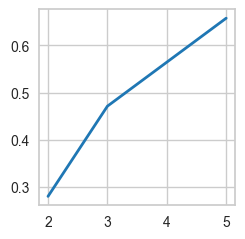

In [32]:
print(f'components : {components}')
print(f'f1-scores  : {f1_score_values}')

# plotting list of f1-score of all n_components values 
# plt.style.use('_mpl-gallery')

# plot graph
fig, ax = plt.subplots()
ax.plot(components, f1_score_values, linewidth=2.0)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))
plt.show()


(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [ ]:
# TODO: Evaluate models in Test split

# Usar regressão logística 

# Evaluating Baseline Logistic Regression in the test dataset


# Evaluating Logistic Regression combined with PCA in the test dataset



**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**